In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
np.random.seed(1)
m=50
x=2*np.random.rand(m,1)
y=(4+3*x+np.random.randn(m,1)).ravel()

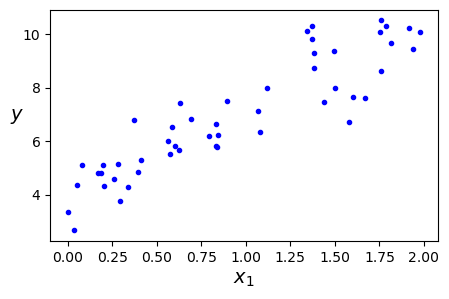

In [7]:
plt.figure(figsize=(5,3))
plt.plot(x,y,'bo',markersize=3)
plt.xlabel('$x_1$',fontsize=14)
plt.ylabel('$y$',fontsize=14,rotation=0)
plt.show()

In [8]:
from sklearn.svm import LinearSVR
svm_reg=LinearSVR(epsilon=0.5,random_state=1)
svm_reg.fit(x,y)
svm_reg.intercept_, svm_reg.coef_

C:\Users\TMX\ANACONDA\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


(array([3.82895689]), array([3.18608831]))

In [9]:
svm_reg.score(x,y)

0.813787675910222

In [10]:
def find_support_vectors(svm_reg,x,y,epsilon):
    y_pred=svm_reg.predict(x)
    off_margin=(np.abs(y-y_pred)>=epsilon)
    return np.argwhere(off_margin)

In [11]:
def plot_svm_regression(model,x,y,epsilon,axes):
    x1s=np.linspace(axes[0],axes[1],100).reshape(100,1)
    y_pred=model.predict(x1s)
    plt.plot(x1s,y_pred,'r-',linewidth=2,label='$\hat{y}$')
    plt.plot(x1s,y_pred+epsilon,'k--')
    plt.plot(x1s,y_pred-epsilon,'k--')
    model.support_=find_support_vectors(model,x,y,epsilon)
    plt.scatter(x[model.support_],y[model.support_],c='red',s=50,alpha=0.3)
    plt.plot(x,y,'bo',markersize=3)
    plt.xlabel('$x_1$',fontsize=14)
    plt.ylabel('$y$',fontsize=14,rotation=0)
    plt.legend(loc='lower right')

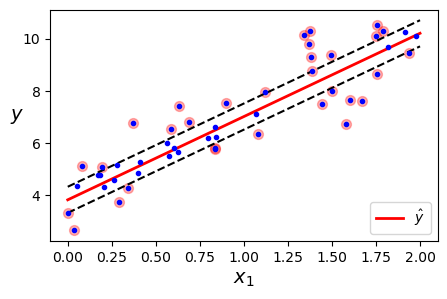

In [12]:
plt.figure(figsize=(5,3))
plot_svm_regression(svm_reg,x,y,0.5,[0,2,3,11])
plt.show()

In [13]:
from sklearn.linear_model import SGDRegressor
sgd_reg=SGDRegressor(loss='epsilon_insensitive',epsilon=0.5,random_state=1)
sgd_reg.fit(x,y)
sgd_reg.intercept_, svm_reg.coef_

(array([3.70372653]), array([3.18608831]))

In [14]:
sgd_reg.score(x,y)

0.8115955618208129

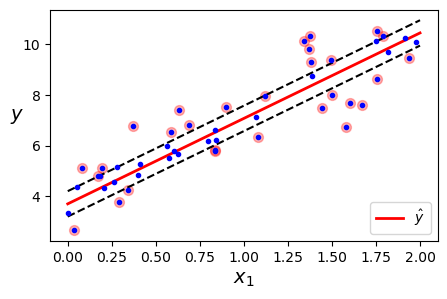

In [15]:
plt.figure(figsize=(5,3))
plot_svm_regression(sgd_reg,x,y,0.5,[0,2,3,11])
plt.show()

In [16]:
from sklearn.svm import SVR
svr_reg=SVR(kernel='linear',epsilon=0.5)
svr_reg.fit(x,y)
svr_reg.intercept_, svr_reg.coef_

(array([4.21115491]), array([[2.91591784]]))

In [17]:
svr_reg.score(x,y)

0.8134889655563093

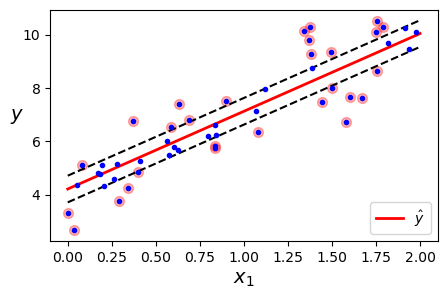

In [18]:
plt.figure(figsize=(5,3))
plot_svm_regression(svr_reg,x,y,0.5,[0,2,3,11])
plt.show()

In [20]:
np.random.seed(1)
m=100
x=2*np.random.rand(m,1)-1
y=(0.2+0.1*x+0.5*x**2+np.random.randn(m,1)/10).ravel()

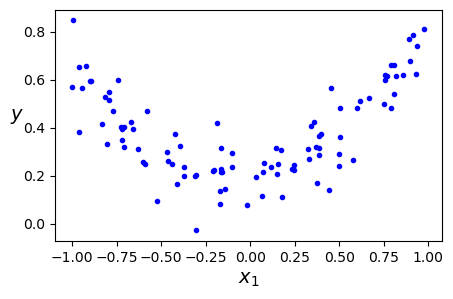

In [21]:
plt.figure(figsize=(5,3))
plt.plot(x,y,'bo',markersize=3)
plt.xlabel('$x_1$',fontsize=14)
plt.ylabel('$y$',fontsize=14,rotation=0)
plt.show()

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [23]:
poly_svm_reg=Pipeline([
    ('poly_features',PolynomialFeatures(degree=2,include_bias=False)),
    ('scaler',StandardScaler()),
    ('poly_svm',LinearSVR(max_iter=10000,epsilon=0.1,random_state=1))
])

In [25]:
poly_svm_reg.fit(x,y)
poly_svm_reg['poly_svm'].intercept_,\
poly_svm_reg['poly_svm'].coef_

C:\Users\TMX\ANACONDA\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


(array([0.37849953]), array([0.03567448, 0.16274833]))

In [26]:
poly_svm_reg.score(x,y)

0.7690321422676615

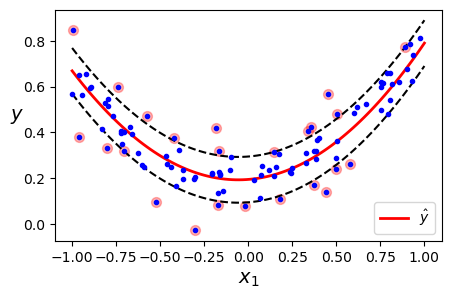

In [28]:
plt.figure(figsize=(5,3))
plot_svm_regression(poly_svm_reg,x,y,0.1,[-1,1,0,1])
plt.show()

In [29]:
poly_sgd_reg=Pipeline([
    ('poly_features',PolynomialFeatures(degree=2,include_bias=False)),
    ('scaler',StandardScaler()),
    ('poly_sgd',SGDRegressor(loss='epsilon_insensitive',epsilon=0.1,random_state=1))
])
poly_sgd_reg.fit(x,y)
poly_sgd_reg['poly_sgd'].intercept_, poly_sgd_reg['poly_sgd'].coef_

(array([0.37549958]), array([0.04139847, 0.15873503]))

In [30]:
poly_sgd_reg.score(x,y)

0.7724751759150993

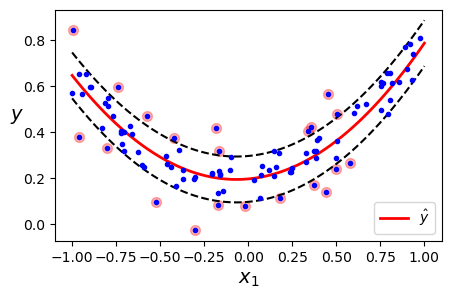

In [32]:
plt.figure(figsize=(5,3))
plot_svm_regression(poly_sgd_reg,x,y,0.1,[-1,1,0,1])
plt.show()

In [33]:
poly_svr_reg=SVR(kernel='poly',degree=2,epsilon=0.1,gamma=1)
poly_svr_reg.fit(x,y)

SVR(degree=2, gamma=1, kernel='poly')

In [34]:
poly_svr_reg.score(x,y)

0.7019128605564215

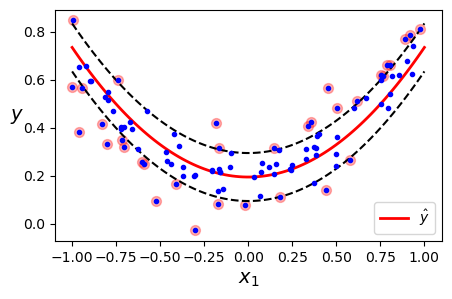

In [35]:
plt.figure(figsize=(5,3))
plot_svm_regression(poly_svr_reg,x,y,0.1,[-1,1,0,1])
plt.show()

In [36]:
rbf_svr_reg=SVR(kernel='rbf',degree=2,epsilon=0.1,gamma=1)
rbf_svr_reg.fit(x,y)

SVR(degree=2, gamma=1)

In [37]:
rbf_svr_reg.score(x,y)

0.7645639795714291

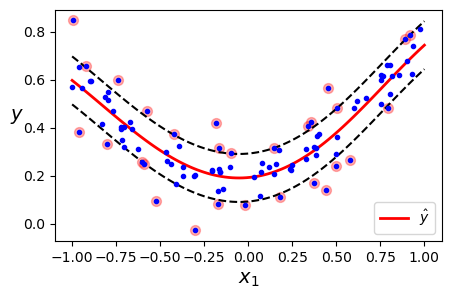

In [39]:
plt.figure(figsize=(5,3))
plot_svm_regression(rbf_svr_reg,x,y,0.1,[-1,1,0,1])
plt.show()

In [40]:
import numpy as np
import matplotlib.pyplot as plt

In [41]:
from sklearn import datasets
iris=datasets.load_iris()
x=iris['data']
y=iris['target']

In [43]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(random_state=1)
ovr_clf=OneVsRestClassifier(log_reg)
ovr_clf.fit(x,y)

OneVsRestClassifier(estimator=LogisticRegression(random_state=1))

In [44]:
ovr_clf.score(x,y)

0.9533333333333334

In [45]:
y_pred=ovr_clf.predict(x)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y,y_pred)

array([[50,  0,  0],
       [ 0, 45,  5],
       [ 0,  2, 48]], dtype=int64)

In [47]:
ovr_log=LogisticRegression(multi_class='ovr',random_state=1)
ovr_log.fit(x,y)

LogisticRegression(multi_class='ovr', random_state=1)

In [48]:
ovr_log.score(x,y)

0.9533333333333334

In [49]:
y_pred=ovr_log.predict(x)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [50]:
confusion_matrix(y,y_pred)

array([[50,  0,  0],
       [ 0, 45,  5],
       [ 0,  2, 48]], dtype=int64)

In [52]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC
svc_clf=SVC(random_state=1)
ovo_clf=OneVsOneClassifier(svc_clf)
ovo_clf.fit(x,y)

OneVsOneClassifier(estimator=SVC(random_state=1))

In [53]:
ovo_clf.score(x,y)

0.9733333333333334

In [54]:
y_pred=ovo_clf.predict(x)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [55]:
confusion_matrix(y,y_pred)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  2, 48]], dtype=int64)

In [56]:
ovo_svc=SVC(decision_function_shape='ovo',random_state=1)
ovo_svc.fit(x,y)

SVC(decision_function_shape='ovo', random_state=1)

In [57]:
ovo_svc.score(x,y)

0.9733333333333334

In [59]:
y_pred=ovo_svc.predict(x)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [61]:
confusion_matrix(y,y_pred)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  2, 48]], dtype=int64)